In [1]:
import re
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/podrobno-scraped-original/podrobno_original.csv')
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count
0,▫️ Мирзиёев отправился с визитом в Германию \n...,2023-05-02 13:23:49,3582,12,48,0,0,1,0,0,5,0
1,▫️ В Узбекистане появится еще один праздничный...,2023-05-02 12:26:41,8942,139,28,0,0,40,0,0,2,0
2,▫️ Узгидромет опубликовал прогноз погоды на пр...,2023-05-02 12:01:42,10044,22,6,0,0,11,0,0,39,0
3,▫️ Китайская компания CC7 Industries установит...,2023-05-02 11:29:48,11446,31,20,0,0,44,0,0,9,0
4,"▫️ В Ташкенте произошло очередное ДТП, в резул...",2023-05-02 11:04:59,12396,15,18,0,0,6,68,0,0,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           7917 non-null   object
 1   date           7917 non-null   object
 2   view_count     7917 non-null   int64 
 3   like_count     7917 non-null   int64 
 4   dislike_count  7917 non-null   int64 
 5   love_count     7917 non-null   int64 
 6   fire_count     7917 non-null   int64 
 7   happy_count    7917 non-null   int64 
 8   sad_count      7917 non-null   int64 
 9   clap_count     7917 non-null   int64 
 10  think_count    7917 non-null   int64 
 11  angry_count    7917 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 742.3+ KB


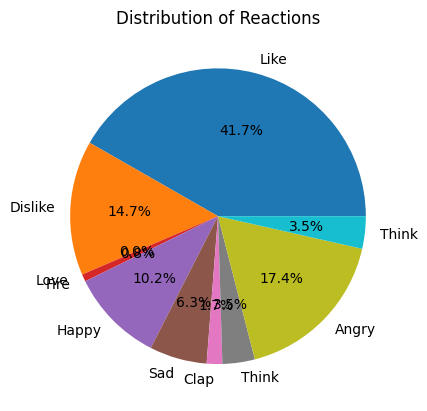

In [4]:
like_count = df['like_count'].sum()
dislike_count = df['dislike_count'].sum()
love_count = df['love_count'].sum()
fire_count = df['fire_count'].sum()
happy_count = df['happy_count'].sum()
sad_count = df['sad_count'].sum()
clap_count = df['clap_count'].sum()
angry_count = df['angry_count'].sum()
think_count = df['think_count'].sum()

emoji_counts = [like_count, dislike_count, love_count, fire_count, happy_count, sad_count, clap_count, think_count, angry_count, think_count]
emoji_labels = ['Like', 'Dislike', 'Love', 'Fire', 'Happy', 'Sad', 'Clap', 'Think', 'Angry', 'Think']
plt.pie(emoji_counts, labels=emoji_labels, autopct='%1.1f%%')
plt.title('Distribution of Reactions')
plt.show()

# Data cleaning

In [5]:
df.iloc[4]['text']

'▫️ В Ташкенте произошло очередное ДТП, в результате которого полностью выгорел автомобиль "Кобальт"\n\n▪️Подпишись на Podrobno.uz▪️'

In [6]:
df['total_reactions'] = df['like_count'] + df['dislike_count'] + df['think_count'] + df['love_count'] + df['fire_count'] + df['happy_count'] + df['sad_count'] + df['clap_count'] + df['angry_count']
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions
0,▫️ Мирзиёев отправился с визитом в Германию \n...,2023-05-02 13:23:49,3582,12,48,0,0,1,0,0,5,0,66
1,▫️ В Узбекистане появится еще один праздничный...,2023-05-02 12:26:41,8942,139,28,0,0,40,0,0,2,0,209
2,▫️ Узгидромет опубликовал прогноз погоды на пр...,2023-05-02 12:01:42,10044,22,6,0,0,11,0,0,39,0,78
3,▫️ Китайская компания CC7 Industries установит...,2023-05-02 11:29:48,11446,31,20,0,0,44,0,0,9,0,104
4,"▫️ В Ташкенте произошло очередное ДТП, в резул...",2023-05-02 11:04:59,12396,15,18,0,0,6,68,0,0,13,120


In [7]:
zero_reactions = df[df['total_reactions'] == 0]
zero_reactions.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions
7531,⭕️С 18 по 22 апреля в Ташкенте пройдет Tashken...,2022-04-18 18:39:11,26644,0,0,0,0,0,0,0,0,0,0
7536,Гимнастки из Узбекистана стали первыми в общек...,2022-04-18 17:03:47,26233,0,0,0,0,0,0,0,0,0,0
7544,⭕️В одном из частных домов Ташкентской области...,2022-04-18 10:32:19,26399,0,0,0,0,0,0,0,0,0,0
7548,⭕️Узбекистанцы продолжают делиться своими исто...,2022-04-17 11:01:02,31510,0,0,0,0,0,0,0,0,0,0
7558,"⭕️Возле рынка ""Куйлюк"" с 16 апреля стартует ст...",2022-04-15 22:55:56,29497,0,0,0,0,0,0,0,0,0,0


In [8]:
zero_reactions = df[df['total_reactions'] == 0]
zero_reactions.nunique()

text               40
date               40
view_count         40
like_count          1
dislike_count       1
love_count          1
fire_count          1
happy_count         1
sad_count           1
clap_count          1
think_count         1
angry_count         1
total_reactions     1
dtype: int64

In [9]:
num_rows_with_zero_reactions = len(df[df['total_reactions'] == 0])
num_rows_with_zero_reactions

40

In [10]:
# with less than 5. Note we are not droping yet

zero_reactions = df[df['total_reactions'] < 10]
zero_reactions.nunique()

text               377
date               377
view_count         366
like_count          10
dislike_count        4
love_count           1
fire_count           3
happy_count          3
sad_count            4
clap_count           2
think_count          3
angry_count          2
total_reactions     10
dtype: int64

In [11]:
# check for nan texts
nan_mask = df.isna().any(axis=1)
nan_rows = df[nan_mask]
nan_rows

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions


In [12]:
df.isna().sum()

text               0
date               0
view_count         0
like_count         0
dislike_count      0
love_count         0
fire_count         0
happy_count        0
sad_count          0
clap_count         0
think_count        0
angry_count        0
total_reactions    0
dtype: int64

In [13]:
df[df['text'].str.contains('реклама|рекламы', case=False)]

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions
19,▫️ Самаркандский международный технологический...,2023-05-01 14:01:51,21675,44,11,0,3,0,4,0,1,1,64
59,Assalom Jomiy – это один из первых эко-квартал...,2023-04-28 14:30:05,20191,19,46,0,0,5,0,0,0,0,70
103,"▫️ Управление, бизнес и строительство: какие т...",2023-04-26 14:10:56,23922,32,5,0,3,3,0,2,12,0,57
122,Отпуск со скидкой: 5% кэшбэка на бронирование ...,2023-04-25 18:00:06,22664,45,5,0,0,4,0,0,3,0,57
128,▫️ Амир Милушев стал победителем турнира в Бол...,2023-04-25 15:01:15,23608,63,2,0,3,2,1,144,0,0,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7874,"Дарим 5 мобильных телефонов iPhone 13, 5 элект...",2021-12-03 16:00:31,27256,1,0,0,0,0,0,0,0,0,1
7878,❗️Срочно продается отличный дом–КОРОБКА ниже р...,2021-11-26 16:27:39,27267,0,0,0,0,0,0,0,0,0,0
7879,Ташкентский государственный транспортный униве...,2021-11-26 09:03:09,27679,1,0,0,0,0,0,0,0,0,1
7909,🌖 ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА ЗА НЕДЕЛЮ: ВСЕ С...,2021-09-06 07:33:46,31783,1,0,0,0,0,0,0,0,0,1


In [14]:
df.loc[df['text'].str.contains('реклама|рекламы', na=False), 'promotional'] = 'yes'
df.loc[~df['text'].str.contains('реклама|рекламы', na=False), 'promotional'] = 'no'

In [15]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional
7648,"⭕️Жители Ташкента прошли 17 судов, чтобы побед...",2022-03-31 23:58:21,28115,2,0,0,0,0,0,0,0,0,2,no
7684,⭕️В мае в автобусах Ташкента планируется запус...,2022-03-16 09:36:44,30660,1,0,0,0,0,0,0,0,0,1,no
5537,⭕️Ряд узбекских компаний продолжает пользовать...,2022-07-25 18:45:09,25775,20,71,0,0,51,0,0,12,22,176,no
4083,⭕️Российская авиакомпания Red Wings с 4 ноября...,2022-10-04 13:44:03,25403,157,15,0,0,4,0,0,0,0,176,no
1446,▫️ Узгидромет опубликовал прогноз погоды на пр...,2023-02-13 11:55:44,26052,93,21,0,0,5,1,0,4,0,124,no


In [16]:
rows_to_drop = df[(df['promotional'] == 'no') & (df['total_reactions'] <= 9)]
rows_to_drop

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional
7484,⭕️В столичной поликлинике пытались установить ...,2022-04-20 23:16:21,27483,6,0,0,0,0,0,0,0,0,6,no
7485,⭕️В Узбекистане с 1 августа 2022 года вводится...,2022-04-20 22:31:48,29087,3,0,0,0,0,0,0,0,0,3,no
7488,⭕️Красочный фестиваль китайского языка и культ...,2022-04-20 19:38:37,26454,8,0,0,0,0,0,0,0,0,8,no
7489,⭕️Спасатели МЧС проводят работу по ликвидации ...,2022-04-20 18:56:34,36378,4,0,0,0,0,0,0,0,0,4,no
7492,❗️ ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К ВЕЧЕРУ 20 АПР...,2022-04-20 18:08:10,26405,3,0,0,0,0,0,0,0,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7912,Первая частная авиакомпания Узбекистана Qanot ...,2021-08-23 16:17:44,32246,0,0,0,0,0,0,0,1,0,1,no
7913,В соцсетях появилась информация о принудительн...,2021-08-23 15:51:49,33348,0,0,0,0,0,0,0,1,0,1,no
7914,Интересная ситуация произошла в Узбекистане. В...,2021-08-19 09:14:04,36507,1,1,0,0,0,0,0,0,0,2,no
7915,⭕️В Узбекистане хотят провести международный т...,2021-08-19 00:23:06,33031,1,0,0,0,0,0,0,0,0,1,no


In [17]:
# before dropping
df.shape

(7917, 14)

In [18]:
# drop non-promotional news with total reactions less than 10
df = df.drop(df[(df['promotional'] == 'no') & (df['total_reactions'] < 10)].index)
# after dropping
df.shape

(7570, 14)

# Data labeling

In [19]:
# define the weights for each reaction
weights = {
    'like': 1,
    'dislike': -1,
    'love': 2,
    'fire': 1.5,
    'happy': 1.5,
    'sad': -1.5,
    'clap': 1,
    'angry': -2,
    'think': 0.5
}

# calculate the total weighted reactions for each row
df['total_weighted_reactions'] = (df['like_count']*weights['like'] + 
                                  df['dislike_count']*weights['dislike'] + 
                                  df['love_count']*weights['love'] + 
                                  df['fire_count']*weights['fire'] + 
                                  df['happy_count']*weights['happy'] + 
                                  df['sad_count']*weights['sad'] + 
                                  df['clap_count']*weights['clap'] + 
                                  df['angry_count']*weights['angry'] + 
                                  df['think_count']*weights['think'])

# define the threshold values
positive_threshold = 1
negative_threshold = -1

# cassify the sentiment based on the total weighted reactions
df['sentiment'] = df['total_weighted_reactions'].apply(lambda x: 'positive' if x > positive_threshold else ('negative' if x < negative_threshold else 'neutral'))

print(df['sentiment'].value_counts())

positive    5349
negative    2183
neutral       38
Name: sentiment, dtype: int64


In [20]:
df[df['sentiment'] == 'neutral']

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional,total_weighted_reactions,sentiment
705,❗️ ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К УТРУ 26 МАРТА...,2023-03-26 09:22:27,25586,12,16,0,0,3,0,0,0,0,31,no,0.5,neutral
1724,😁 Служба санитарно-эпидемиологического благопо...,2023-01-30 20:36:34,30281,99,3,0,2,20,0,0,6,66,196,no,0.0,neutral
2787,😁 Правоохранители обезвредили трех расхитителе...,2022-12-06 20:26:31,24661,95,0,0,0,6,1,3,3,53,161,no,1.0,neutral
3265,😁 Генконсульство Узбекистана в Турции сообщило...,2022-11-15 11:27:48,22796,73,4,0,0,3,50,0,5,1,136,no,-1.0,neutral
3485,😁 Сотрудники правоохранительных органов задерж...,2022-11-03 11:43:18,22846,94,0,0,0,13,9,4,0,52,172,no,0.0,neutral
3568,😁 В Узбекистане стартовали продажи автомобилей...,2022-10-31 09:34:49,24477,50,70,0,0,12,0,5,0,2,139,yes,-1.0,neutral
4232,"⭕️В Ташкенте задержан мошенник, выставлявший в...",2022-09-26 10:43:42,27418,98,8,0,0,25,1,0,6,64,202,no,1.0,neutral
4330,⭕️Узбекистан в этом году импортировал автомоби...,2022-09-20 09:41:57,24089,49,65,0,0,9,0,0,15,2,140,no,1.0,neutral
5033,⭕️Группа мужчин устроила драку на борту самоле...,2022-08-16 21:39:18,26319,28,2,0,0,0,0,2,1,14,47,no,0.5,neutral
5172,"⭕️В Узбекистане будет создано движение ""Умные ...",2022-08-10 13:27:47,26840,69,323,0,0,186,0,5,20,20,623,no,0.0,neutral


In [21]:
# just drop neutral rows as we only have 39 of such
df = df[df['sentiment'] != 'neutral']

In [22]:
df[df['sentiment'] == 'neutral'].nunique().sum()

0

In [23]:
# remove temp column
df = df.drop(['total_weighted_reactions'], axis=1)

In [24]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional,sentiment
5389,⭕️Массовое отравление трудовых мигрантов из Уз...,2022-08-01 12:38:42,25524,25,9,0,7,7,123,0,0,4,175,no,negative
5036,⭕️Участок дороги на проспекте Навои закроют дл...,2022-08-16 18:33:05,25530,29,11,0,0,5,1,0,0,44,90,no,negative
5762,"⭕️Узбекистанцы сегодня, 14 июля, столкнулись с...",2022-07-14 17:19:15,26938,17,81,0,0,22,0,2,6,186,314,no,negative
7019,"⭕️Художник Хасан Майчеев, подправивший граффит...",2022-05-14 00:28:13,28563,218,44,0,0,11,0,8,10,0,291,no,positive
807,▫️ Мирзиёев осмотрел выставки национальных кул...,2023-03-21 14:17:18,22779,202,10,0,4,6,1,0,0,2,225,no,positive


## quick EDA 

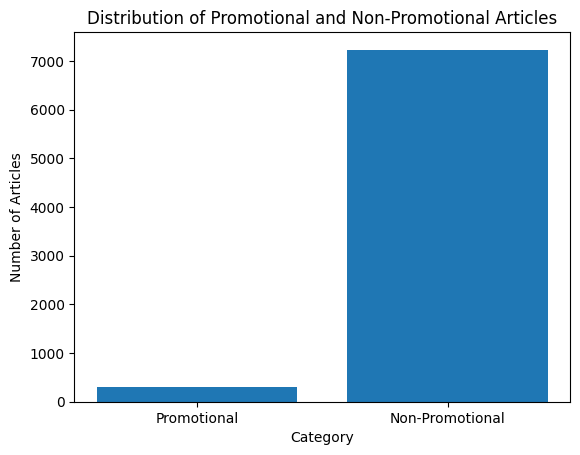

In [25]:
promotional_count = df[df['promotional'] == 'yes'].shape[0]
non_promotional_count = df[df['promotional'] == 'no'].shape[0]

labels = ['Promotional', 'Non-Promotional']
counts = [promotional_count, non_promotional_count]

plt.bar(labels, counts)
plt.title('Distribution of Promotional and Non-Promotional Articles')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

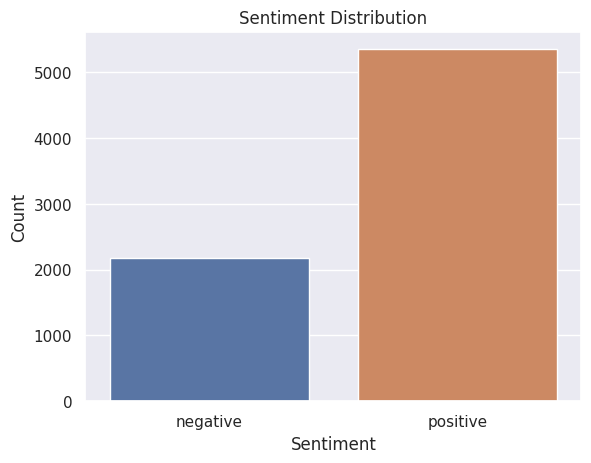

In [26]:
sns.set(style='darkgrid')

sns.countplot(x='sentiment', data=df)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## continue cleaning data

In [27]:
df_filtered = df[(df['promotional'] == 'no')]

random_texts = df_filtered.sample(n=20, random_state=42)['text']

for text in random_texts:
    print(text)
    print('------------')

😁 Власти Узбекистана выдали очередное странное решение на фоне аномальных морозов, пришедших в страну. Министерство высшего образования, науки и инноваций Узбекистана сегодня сообщило, что учеба в вузах, техникумах, колледжах, профессиональных школах и лицеях начнется поэтапно уже с 11 января по согласованию с местными хокимиятами. И это при том, что буквально несколько дней назад зимние каникулы были продлены до 17 января, и большая часть из студентов уже переоформила билеты для возвращения в Ташкент на новый срок.   

▪️Подпишись на Podrobno.uz▪️
------------
⭕️Uzbekistan Airways с 7 мая запускает регулярное авиасообщение между Узбекистаном и Египтом.

▪️@podrobno▪️
------------
😁 Дело, в рамках которого российского бизнесмена Алишера Усманова подозревают в Германии в отмывании денег, вызвало политические разногласия между ФРГ и Узбекистаном

▪️Подпишись на Podrobno.uz▪️
------------
⭕️В Узбекистане 28 апреля в 03:28 ночи произошло землетрясение, сила подземных толчков достигла четыр

In [28]:
total_mentions = df['text'].str.contains('@podrobno|Подпишись на Podrobno.uz').sum()
username_mentions = df['text'].str.contains('@podrobno').sum()
subscribe_mentions = df['text'].str.contains('Подпишись на Podrobno.uz').sum()

print(f"Total Podrobno mentions: {total_mentions}\nиз них")
print(f"@podrobno mentions: {username_mentions}\n▪️Подпишись на Podrobno.uz▪️ mentions: {subscribe_mentions}")

Total Podrobno mentions: 6460
из них
@podrobno mentions: 3590
▪️Подпишись на Podrobno.uz▪️ mentions: 2870


In [29]:
non_promo_df = df[df['promotional'] == 'no']
num_non_promo_news = len(non_promo_df.index)
print("Number of non-promotional news:", num_non_promo_news)

Number of non-promotional news: 7229


In [30]:
# news without patterns
filtered_df = df.loc[~df['text'].str.contains('▪️@podrobno▪️|▪️Подпишись на Podrobno.uz▪️') & (df['promotional'] == 'no')]
print(filtered_df['text'])

8       ❗️ ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К УТРУ 2 МАЯ:  ...
12      ▫️ Нейросеть смоделировала идеальные кроссовки...
15      ❗️ ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К ВЕЧЕРУ 1 МАЯ:...
23      ▫️ По предварительным результатам референдума,...
33      Явка на референдуме в Узбекистане на 11:00 сос...
                              ...                        
7802    Двое 11-летних подростков провалились под лёд ...
7804    Президент России Владимир Путин поздравил глав...
7806    В Самарканде задержали общественного активиста...
7809    На днях в СМИ был опубликован резонансный комм...
7817    В последнее время в соцсетях появляется все бо...
Name: text, Length: 859, dtype: object


In [31]:
def clean_text(text):
    pattern = r'@podrobno|Подпишись на Podrobno.uz'
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags 
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = re.sub(pattern, '', text)
    text = emoji_pattern.sub(r'', text)
    return text

In [32]:
text = "▫️ В Ташкенте мужчина решил расширить свою квартиру. Он пробил пол и снес несущие конструкции, чтобы захватить часть подвала, поставив под угрозу жизни других жителей многоэтажки \n\n▪️Подпишись на Podrobno.uz▪️"
text2 = "⭕️Азиатский банк развития (АБР) одобрил заем в размере 59 миллионов долларов, а также грант на 500 тысяч долларов для улучшения условий жизни в четырех городах Узбекистана. Речь идет о создании новых зеленых пространств, улучшении системы вывоза мусора, водосбережении и других проектах. \n\n ▪️@podrobno▪️"

print(clean_text(text), clean_text(text2))

 В Ташкенте мужчина решил расширить свою квартиру. Он пробил пол и снес несущие конструкции, чтобы захватить часть подвала, поставив под угрозу жизни других жителей многоэтажки 

 Азиатский банк развития (АБР) одобрил заем в размере 59 миллионов долларов, а также грант на 500 тысяч долларов для улучшения условий жизни в четырех городах Узбекистана. Речь идет о создании новых зеленых пространств, улучшении системы вывоза мусора, водосбережении и других проектах. 

 


In [33]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [34]:
df.sample(5)

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional,sentiment,cleaned_text
481,❗️ ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К УТРУ 6 АПРЕЛЯ...,2023-04-06 09:15:27,23770,34,10,0,0,4,0,0,0,0,48,no,positive,ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К УТРУ 6 АПРЕЛЯ: ...
6138,⭕️В Ташкенте задержан очередной пропагандист т...,2022-06-25 17:59:41,29248,152,9,0,0,1,0,0,7,97,266,no,negative,В Ташкенте задержан очередной пропагандист тер...
2977,😁 Узбекистан и Саудовская Аравия завершают раз...,2022-11-28 18:18:42,23626,131,20,0,2,96,0,6,32,0,287,no,positive,Узбекистан и Саудовская Аравия завершают разр...
347,▫️ Настоящая жара. Завтра температура в Навоий...,2023-04-12 15:44:25,26708,41,29,0,105,0,38,0,7,15,235,no,positive,Настоящая жара. Завтра температура в Навоийск...
1313,▫️ Узгидромет опубликовал прогноз погоды на пр...,2023-02-20 11:44:48,26704,179,10,0,0,0,0,10,0,0,199,no,positive,Узгидромет опубликовал прогноз погоды на пред...


In [35]:
df['length'] = df['cleaned_text'].str.len()
print(df['length'].describe())

count    7532.000000
mean      260.345592
std       241.397934
min         0.000000
25%       119.000000
50%       183.000000
75%       317.000000
max      3948.000000
Name: length, dtype: float64


In [36]:
long_messages = df[df['length'] > 320]['text']
long_messages.nunique()

1839

In [37]:
long_messages = df.loc[df['promotional'] == 'yes'].loc[df['length'] > 320]['text']
long_messages.nunique()

196

In [38]:
max_length = 320

df['truncated_text'] = df['cleaned_text'].apply(lambda x: x[:max_length] if len(x) > max_length else x)

truncated_df = df[df['truncated_text'] != df['cleaned_text']]

truncated_df[['cleaned_text', 'truncated_text']]

,cleaned_text,truncated_text
0,Мирзиёев отправился с визитом в Германию \n\n...,Мирзиёев отправился с визитом в Германию \n\n...
8,ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К УТРУ 2 МАЯ: \n...,ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К УТРУ 2 МАЯ: \n...
9,Спецназ органов внутренних дел задержал члено...,Спецназ органов внутренних дел задержал члено...
15,ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К ВЕЧЕРУ 1 МАЯ: ...,ГЛАВНЫЕ НОВОСТИ УЗБЕКИСТАНА К ВЕЧЕРУ 1 МАЯ: ...
16,Через два года Китай будет отмечать 70-летие ...,Через два года Китай будет отмечать 70-летие ...
...,...,...
7815,"Секрет успеха. ""Узметкомбинат"" и Freedom Finan...","Секрет успеха. ""Узметкомбинат"" и Freedom Finan..."
7817,В последнее время в соцсетях появляется все бо...,В последнее время в соцсетях появляется все бо...
7825,Международная финансовая корпорация IFC призна...,Международная финансовая корпорация IFC призна...
7837,В большую команду VENKON требуется специалист ...,В большую команду VENKON требуется специалист ...


In [39]:
df['length_tr'] = df['truncated_text'].str.len()
print(df['length_tr'].describe())

count    7532.000000
mean      200.557621
std        90.267772
min         0.000000
25%       119.000000
50%       183.000000
75%       317.000000
max       320.000000
Name: length_tr, dtype: float64


In [40]:
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional,sentiment,cleaned_text,length,truncated_text,length_tr
0,▫️ Мирзиёев отправился с визитом в Германию \n...,2023-05-02 13:23:49,3582,12,48,0,0,1,0,0,5,0,66,no,negative,Мирзиёев отправился с визитом в Германию \n\n...,447,Мирзиёев отправился с визитом в Германию \n\n...,320
1,▫️ В Узбекистане появится еще один праздничный...,2023-05-02 12:26:41,8942,139,28,0,0,40,0,0,2,0,209,no,positive,В Узбекистане появится еще один праздничный в...,207,В Узбекистане появится еще один праздничный в...,207
2,▫️ Узгидромет опубликовал прогноз погоды на пр...,2023-05-02 12:01:42,10044,22,6,0,0,11,0,0,39,0,78,no,positive,Узгидромет опубликовал прогноз погоды на пред...,159,Узгидромет опубликовал прогноз погоды на пред...,159
3,▫️ Китайская компания CC7 Industries установит...,2023-05-02 11:29:48,11446,31,20,0,0,44,0,0,9,0,104,no,positive,Китайская компания CC7 Industries установит с...,99,Китайская компания CC7 Industries установит с...,99
4,"▫️ В Ташкенте произошло очередное ДТП, в резул...",2023-05-02 11:04:59,12396,15,18,0,0,6,68,0,0,13,120,no,negative,"В Ташкенте произошло очередное ДТП, в результ...",99,"В Ташкенте произошло очередное ДТП, в результ...",99


In [41]:
df.columns

Index(['text', 'date', 'view_count', 'like_count', 'dislike_count',
       'love_count', 'fire_count', 'happy_count', 'sad_count', 'clap_count',
       'think_count', 'angry_count', 'total_reactions', 'promotional',
       'sentiment', 'cleaned_text', 'length', 'truncated_text', 'length_tr'],
      dtype='object')

In [42]:
# drop extra columns
df = df.drop(columns=['length', 'cleaned_text', 'length_tr', 'text'])
df = df.rename(columns={'truncated_text': 'text'})
cols = df.columns.tolist()
cols = ['text'] + cols[:-1]
df = df[cols]
df.head()

,text,date,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions,promotional,sentiment
0,Мирзиёев отправился с визитом в Германию \n\n...,2023-05-02 13:23:49,3582,12,48,0,0,1,0,0,5,0,66,no,negative
1,В Узбекистане появится еще один праздничный в...,2023-05-02 12:26:41,8942,139,28,0,0,40,0,0,2,0,209,no,positive
2,Узгидромет опубликовал прогноз погоды на пред...,2023-05-02 12:01:42,10044,22,6,0,0,11,0,0,39,0,78,no,positive
3,Китайская компания CC7 Industries установит с...,2023-05-02 11:29:48,11446,31,20,0,0,44,0,0,9,0,104,no,positive
4,"В Ташкенте произошло очередное ДТП, в результ...",2023-05-02 11:04:59,12396,15,18,0,0,6,68,0,0,13,120,no,negative


In [43]:
df = df.reindex(columns=['text', 'date', 'sentiment', 'promotional', 'view_count', 'like_count', 'dislike_count',
                         'love_count', 'fire_count', 'happy_count', 'sad_count', 'clap_count',
                         'think_count', 'angry_count', 'total_reactions'])

df.head()

,text,date,sentiment,promotional,view_count,like_count,dislike_count,love_count,fire_count,happy_count,sad_count,clap_count,think_count,angry_count,total_reactions
0,Мирзиёев отправился с визитом в Германию \n\n...,2023-05-02 13:23:49,negative,no,3582,12,48,0,0,1,0,0,5,0,66
1,В Узбекистане появится еще один праздничный в...,2023-05-02 12:26:41,positive,no,8942,139,28,0,0,40,0,0,2,0,209
2,Узгидромет опубликовал прогноз погоды на пред...,2023-05-02 12:01:42,positive,no,10044,22,6,0,0,11,0,0,39,0,78
3,Китайская компания CC7 Industries установит с...,2023-05-02 11:29:48,positive,no,11446,31,20,0,0,44,0,0,9,0,104
4,"В Ташкенте произошло очередное ДТП, в результ...",2023-05-02 11:04:59,negative,no,12396,15,18,0,0,6,68,0,0,13,120


In [44]:
df.to_csv('podrobno_cleaned_detailed.csv', index=False, encoding='utf-8-sig')

In [45]:
compact_df = df[['text', 'date', 'sentiment', 'promotional']]
compact_df.head()

,text,date,sentiment,promotional
0,Мирзиёев отправился с визитом в Германию \n\n...,2023-05-02 13:23:49,negative,no
1,В Узбекистане появится еще один праздничный в...,2023-05-02 12:26:41,positive,no
2,Узгидромет опубликовал прогноз погоды на пред...,2023-05-02 12:01:42,positive,no
3,Китайская компания CC7 Industries установит с...,2023-05-02 11:29:48,positive,no
4,"В Ташкенте произошло очередное ДТП, в результ...",2023-05-02 11:04:59,negative,no


In [46]:
compact_df.to_csv('podrobno_cleaned_essential.csv', index=False, encoding='utf-8-sig')